In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [9]:
# Task 1: Quantization of Input Data
def quantize_data(data, bits):
    levels = 2 ** bits
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    quantized_data = np.round(((data - min_val) / (max_val - min_val)) * (levels - 1)) * (max_val - min_val) / (levels - 1) + min_val
    return quantized_data


In [10]:
# Load dataset (using Iris as an example)
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

In [11]:
# Task 2: Training and Evaluation with Quantized Data (Cross-Validation)
def evaluate_model(model, X, y):
    skf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    return scores.mean(), scores.std()

In [12]:
# Models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [13]:
# Store results for different precision levels
results = {
    'Full-precision': {},
    '8-bit': {},
    '4-bit': {},
    '2-bit': {}
}

In [14]:
# Full-precision model evaluation
for model_name, model in models.items():
    mean_accuracy, std_accuracy = evaluate_model(model, X, y)
    results['Full-precision'][model_name] = (mean_accuracy, std_accuracy)

In [15]:
# Quantized models evaluation
for bits in [8, 4, 2]:
    quantized_X = quantize_data(X, bits)
    for model_name, model in models.items():
        mean_accuracy, std_accuracy = evaluate_model(model, quantized_X, y)
        results[f'{bits}-bit'][model_name] = (mean_accuracy, std_accuracy)

In [16]:
# Task 3: Comparison with Full-Precision Models
print("Performance Comparison (Mean Accuracy ± Std):")
for precision, precision_results in results.items():
    print(f"\n{precision}:")
    for model_name, (mean_accuracy, std_accuracy) in precision_results.items():
        print(f"{model_name}: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

Performance Comparison (Mean Accuracy ± Std):

Full-precision:
Decision Tree: 0.9667 ± 0.0365
k-NN: 0.9733 ± 0.0249
SVM: 0.9667 ± 0.0211

8-bit:
Decision Tree: 0.9600 ± 0.0327
k-NN: 0.9733 ± 0.0249
SVM: 0.9667 ± 0.0211

4-bit:
Decision Tree: 0.9467 ± 0.0452
k-NN: 0.9667 ± 0.0211
SVM: 0.9533 ± 0.0340

2-bit:
Decision Tree: 0.8067 ± 0.0772
k-NN: 0.7733 ± 0.0327
SVM: 0.8200 ± 0.0618


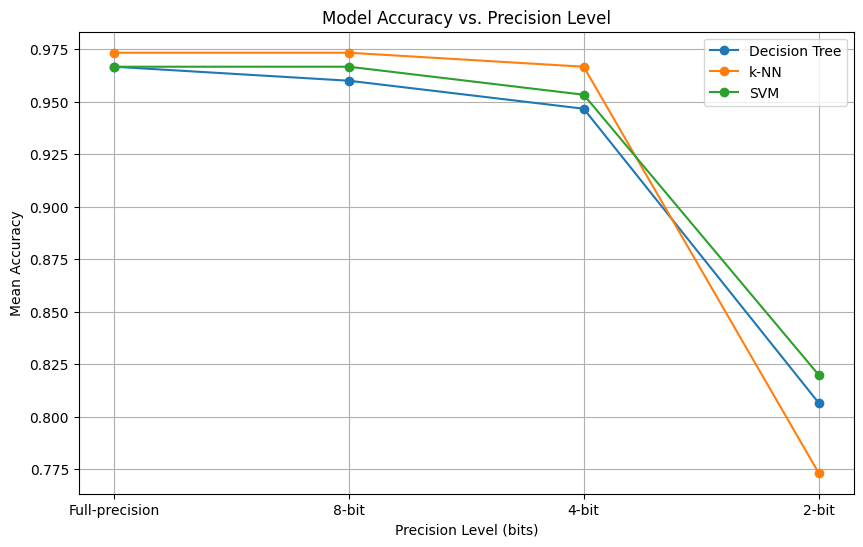

In [17]:
# Task 4: Impact Analysis - Plotting results
plt.figure(figsize=(10, 6))
for model_name in models.keys():
    accuracies = [results[precision][model_name][0] for precision in ['Full-precision', '8-bit', '4-bit', '2-bit']]
    plt.plot(['Full-precision', '8-bit', '4-bit', '2-bit'], accuracies, marker='o', label=model_name)

plt.xlabel('Precision Level (bits)')
plt.ylabel('Mean Accuracy')
plt.title('Model Accuracy vs. Precision Level')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Task 5: Logistic Regression with Quantized Gradient Descent
log_reg_full = LogisticRegression(max_iter=1000)
log_reg_full.fit(X, y)
log_reg_full_pred = log_reg_full.predict(X)
accuracy_full = accuracy_score(y, log_reg_full_pred)

log_reg_quantized = QuantizedLogisticRegression(bits=4)
log_reg_quantized.fit(X, y)
log_reg_quant_pred = log_reg_quantized.predict(X)
accuracy_quant = accuracy_score(y, log_reg_quant_pred)

print(f"\nFull-precision Logistic Regression accuracy: {accuracy_full:.4f}")
print(f"Quantized gradient Logistic Regression accuracy: {accuracy_quant:.4f}")


Full-precision Logistic Regression accuracy: 0.9733
Quantized gradient Logistic Regression accuracy: 0.3333
